In [1]:
import psycopg2

In [2]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import os

In [3]:
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
from sqlalchemy import create_engine

# Postgres username, password, and database name
POSTGRES_USERNAME = os.getenv("ENV_USERNAME")  ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = os.getenv("ENV_PASSWORD") ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD POSTGRES_DBNAME = 'database' ## CHANGE THIS TO YOUR DATABASE NAME
POSTGRES_ADDRESS = os.getenv("ENV_ADDRESS")  ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = os.getenv("ENV_PORT") 
POSTGRES_DBNAME = 'commodities_db'
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=POSTGRES_USERNAME,
                        password=POSTGRES_PASSWORD,
                        ipaddress=POSTGRES_ADDRESS,
                        port=POSTGRES_PORT,
                        dbname=POSTGRES_DBNAME))
# Create the connection
engine = create_engine(postgres_str)
cnx = engine.connect()

In [17]:
crude_oil = pd.read_csv('crude_oil.csv')
crude_oil = crude_oil.rename(columns={"Date":"date", "Value":"usd_per_barrel"})
crude_oil = crude_oil.set_index("date")

In [19]:
crude_oil.to_sql('crude_oil', engine, if_exists='append')

In [23]:
natural_gas = pd.read_csv('natural_gas.csv')
natural_gas = natural_gas.rename(columns={"Date":"date", "Settle":"usd_per_million_btu"})
natural_gas = natural_gas.set_index('date')

In [24]:
natural_gas.to_sql('natural_gas', engine, if_exists='append')

In [29]:
last_5_years_crude_oil_df = crude_oil['2015-01-01':]

https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

In [30]:
last_5_years_crude_oil_df.head()

,usd_per_barrel
date,
2015-01-01,53.45
2015-01-02,52.72
2015-01-05,50.05
2015-01-06,47.98
2015-01-07,48.69


In [28]:
import seaborn 
import matplotlib as plt

In [32]:
last_5_years_crude_oil_df.min()

usd_per_barrel   -36.98
dtype: float64

In [33]:
last_5_years_crude_oil_df.loc[last_5_years_crude_oil_df["usd_per_barrel"] == -36.98, :]

,usd_per_barrel
date,
2020-04-20,-36.98


In [36]:
last_year_crude_oil_df = last_5_years_crude_oil_df['2020-01-01':]

Text(0.5, 1.0, 'Crude Oil 5 Year Price')

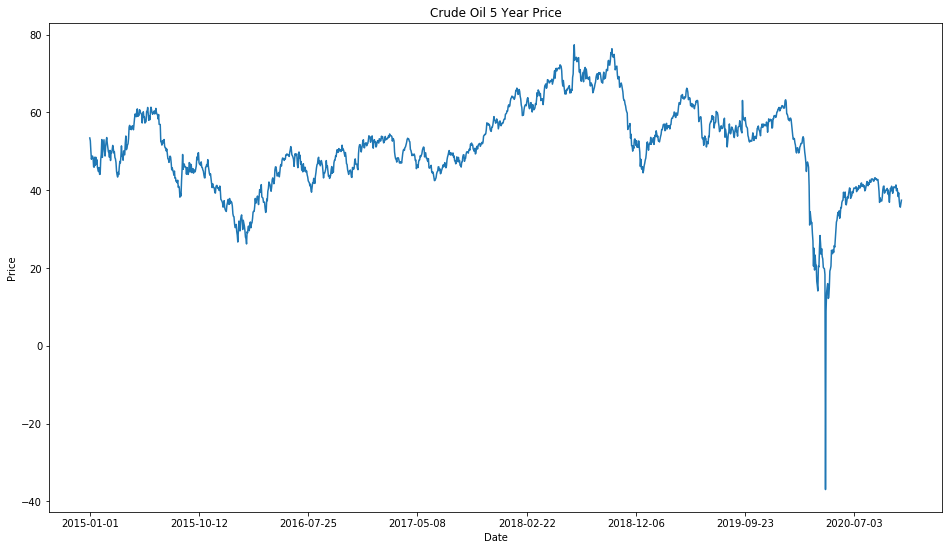

In [44]:
ax = last_5_years_crude_oil_df['usd_per_barrel'].plot(figsize=(16,9))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Crude Oil 5 Year Price')

https://www.nytimes.com/2020/04/20/business/oil-prices.html

Text(0.5, 1.0, 'Crude Oil Last Year Price')

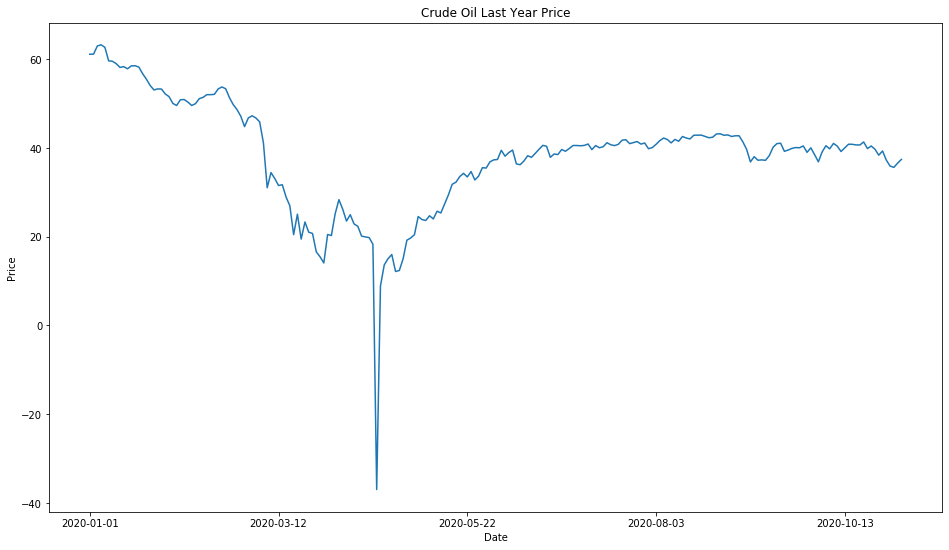

In [46]:
ax = last_year_crude_oil_df['usd_per_barrel'].plot(figsize=(16,9))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Crude Oil Last Year Price')

In [38]:
last_5_years_natural_gas_df = natural_gas['2015-01-01':]

In [41]:
last_2_years_natural_gas_df = natural_gas['2019-01-01':]

Text(0.5, 1.0, 'Natural Gas 5 Year Price')

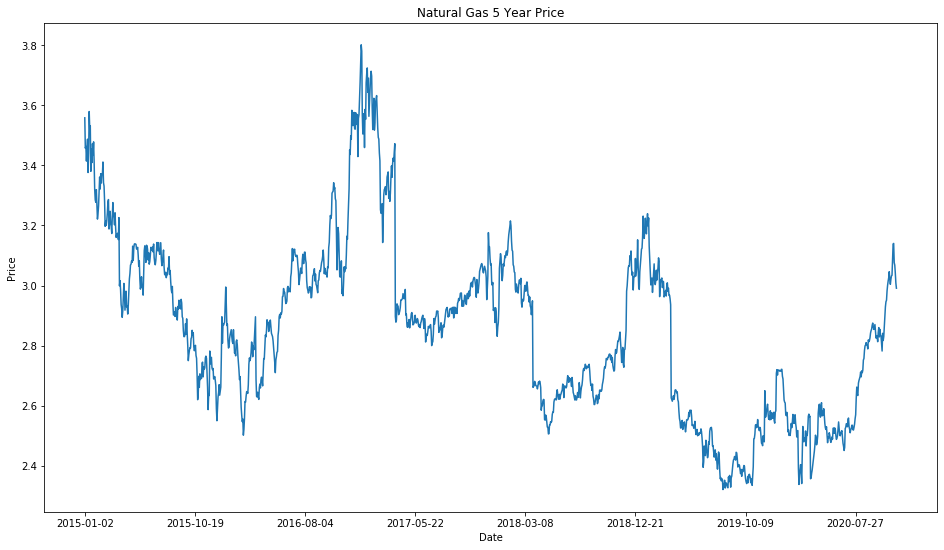

In [48]:
ax = last_5_years_natural_gas_df['usd_per_million_btu'].plot(figsize=(16,9))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas 5 Year Price')

Text(0.5, 1.0, 'Natural Gas 2 Year Price')

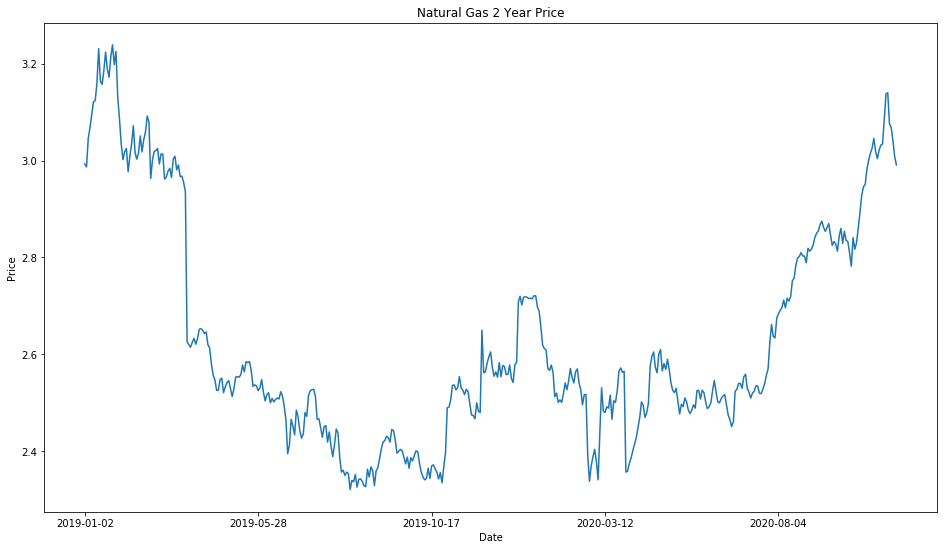

In [50]:
ax = last_2_years_natural_gas_df['usd_per_million_btu'].plot(figsize=(16,9))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas 2 Year Price')

In [51]:
fig = ax.get_figure()
fig.savefig('Figures/2_year_natural_gas_price.png')